<a href="https://colab.research.google.com/github/FGalvao77/Introducao-pratica-na-construcao-de-modelos-para-Series-Temporais/blob/main/Introdu%C3%A7%C3%A3o_pr%C3%A1tica_na_constru%C3%A7%C3%A3o_de_modelos_para_S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introdução prática na construção de modelos para Séries Temporais**
---

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Series-Temporal-Aleatoria-Sazonal.png/800px-Series-Temporal-Aleatoria-Sazonal.png)

### **Introdução**

#### **Série temporal**

Em [estatística](https://pt.wikipedia.org/wiki/Estat%C3%ADstica), [econometria](https://pt.wikipedia.org/wiki/Econometria), [matemática aplicada](https://pt.wikipedia.org/wiki/Matem%C3%A1tica_aplicada) e [processamento de sinais](https://pt.wikipedia.org/wiki/Processamento_de_sinais), uma **série temporal** é uma coleção de observações feitas sequencialmente ao longo do tempo. Em modelos de [regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear) com [dados cross-section](https://pt.wikipedia.org/wiki/Dados_cross-section) a ordem das observações é irrelevante para a análise, em séries temporais a ordem dos dados é fundamental. Uma característica muito importante deste tipo de dados é que as observações vizinhas são dependentes e o interesse é analisar e modelar essa dependência.

As séries temporais existem nas mais variadas áreas de aplicação, como: [finanças](https://pt.wikipedia.org/wiki/Finan%C3%A7as), [marketing](https://pt.wikipedia.org/wiki/Marketing), [economia](https://pt.wikipedia.org/wiki/Economia), seguros, [demografia](https://pt.wikipedia.org/wiki/Demografia), ciências sociais, [meteorologia](https://pt.wikipedia.org/wiki/Meteorologia), [energia](https://pt.wikipedia.org/wiki/Energia), epidemiologia, etc.

- fonte: [Wikipedia](https://pt.wikipedia.org/wiki/S%C3%A9rie_temporal)

In [ ]:
# importando as funções para visualizar a versão do Python e Sistema Operacinal/Versão
from platform import python_version, system, release

# visualizando a versão utilizado do Python e SO/versão
print(f'Versão Python: {python_version()}')
print(f'S.O.: {system()} | Versão: {release()}')

Versão Python: 3.8.10
S.O.: Linux | Versão: 5.4.0-100-generic


In [ ]:
# importando biblioteca para ignorar mensagens de alertas
import warnings
warnings.filterwarnings('ignore')

Para essa atividade, iremos utilizar um conjunto de dados de vendas de _shampoo_ ao longo de período de tempo.

O nosso desafio é, encontrar qual modelo apresenta melhor capacidade de estimar vendas do produto num futuro próximo.

In [ ]:
# importando o conjunto de dados de meu repositório do GitHub
!wget https://raw.githubusercontent.com/FGalvao77/datasets/main/shampoo.csv

--2022-02-28 23:15:18--  https://raw.githubusercontent.com/FGalvao77/datasets/main/shampoo.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 519 [text/plain]
Salvando em: “shampoo.csv.33”

shampoo.csv.33      100%[===================>]     519  --.-KB/s    em 0s      

2022-02-28 23:15:19 (9,63 MB/s) - “shampoo.csv.33” salvo [519/519]



In [ ]:
# visualizando o conjunto de dados
!head shampoo.csv

In [ ]:
# importando a biblioteca para análise e manipulação de dados
import pandas as pd

In [ ]:
# instanciando o conjunto de dados no objeto "series"
series = pd.read_csv('shampoo.csv', sep=',')

# visualizando as 5 primeiras observações
series.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


> Note que, a série não apresenta o `ano` e, somente temos o atributo _mês_ e seguido do _dia_. Portanto, iremos instanciar manualmente o ano em cada observação para facilitar nossas análises e interpretabilidade do problema.

Vamos criar uma função para realizar a _imputação_ do ano em cada observação do conjunto de dados.

In [ ]:
# função para imputar o ano na série temporal
def insert_year(year):
    import pandas as pd
    return pd.to_datetime('200' + series['Month'] + '-01')

In [ ]:
# vamos novamente instanciar o conjunto de dados e definindo os argumentos:
# "parse_dates=[0]" e, utilizando a função no "data_parser=insert_year"
series = pd.read_csv('shampoo.csv', parse_dates=[0], date_parser=insert_year)

In [ ]:
# renomenado a coluna "Mounth" para "Date"
series.rename(columns={'Month': 'Date'}, inplace=True)

# visualizando as 5 primeiras, as 5 amostras aleatórias e as 5 últimas observações
display(
    series.head(),
    series.sample(5),
    series.tail()
)

,Date,Sales
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3


,Date,Sales
32,2003-09-01,682.0
16,2002-05-01,191.4
18,2002-07-01,226.0
4,2001-05-01,180.3
11,2001-12-01,185.9


,Date,Sales
31,2003-08-01,407.6
32,2003-09-01,682.0
33,2003-10-01,475.3
34,2003-11-01,581.3
35,2003-12-01,646.9


In [ ]:
# informações gerais
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


> Podemos ver que, cada atributo está com seu tipo de dado correto dado a sua natureza. <br> E também não há valores faltantes e/ou nulos.

In [ ]:
# visualizando a data inicial e final da série temporal
series['Date'].min(), series['Date'].max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2003-12-01 00:00:00'))

In [ ]:
# estatística descritiva dos dados
pd.DataFrame(series['Sales'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Sales,36.0,312.6,148.937164,119.3,192.45,280.15,411.1,682.0


In [ ]:
# importando bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# configurando o ambiente de exibição
%matplotlib inline
sns.set()

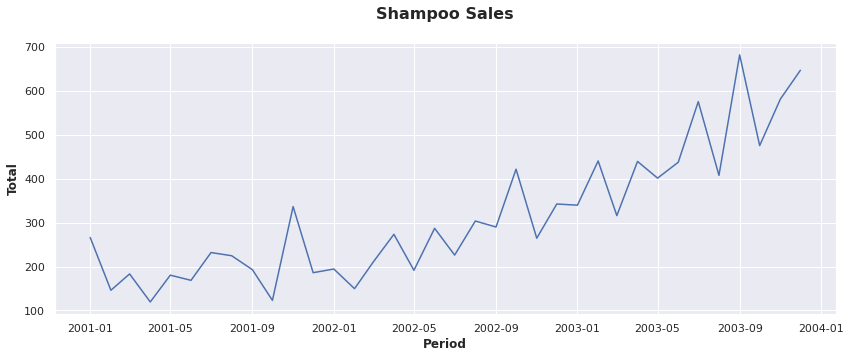

In [ ]:
# plotando gráfico de linhas da série temporal
plt.figure(figsize=(14,5))

plt.title('Shampoo Sales\n', {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Period', {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Total', {'fontsize': 12, 'fontweight': 'bold'})

plt.plot(series['Date'], series['Sales']);

> Com o gráfico de linhas, podemos visualizar que há uma tendência ascedente de vendas ao longo histórico da série.

Vamos explorar um pouco mais essa nossa _intuição_ de tendência de crescimento das vendas e, para isso utilizaremos a função `seasonal_decompose` da biblioteca **statsmodels** que nos fornece apoio visual para uma melhor interpretabilidade dos dados.

Essa função decompõe a informação e nos mostra a _tendência, sazonalidade e os resíduos_ da série temporal.

Se necessário instalar e/ou atualizar a biblioteca `statsmodels`, descomente o código abaixo e execute-o.

In [ ]:
# !pip install statsmodels --upgrade

In [ ]:
# importando a função para decompor a série temporal
from statsmodels.tsa.seasonal import seasonal_decompose

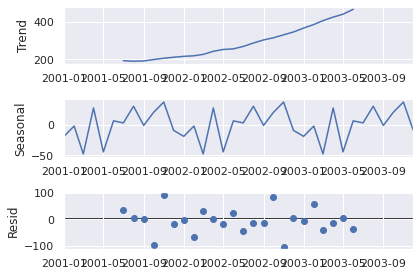

In [ ]:
# utilizando a função "seasonal_decompose" e resetando o índice para exibição dos gráficos
result = seasonal_decompose(series.set_index('Date'))
result.plot(observed=False);

Vamos melhorar nossa visualização gráfica!

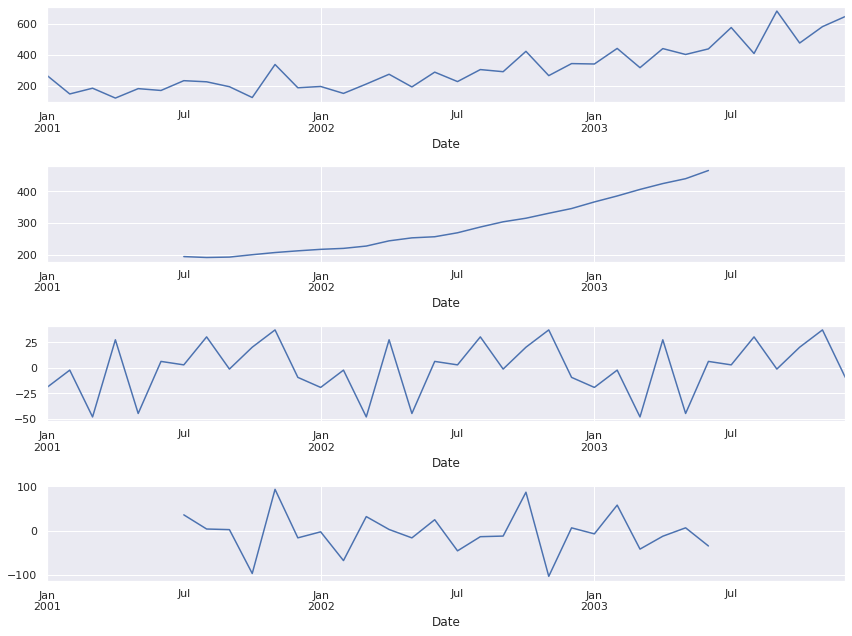

In [ ]:
# decompondo a série tenporal pra visualizar: comportamento geral, tendência, sazonalidade e resíduos dos dados
result = seasonal_decompose(series.set_index('Date'))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(12,9))

result.observed.plot(ax=ax1)    # comportamento geral dos dados
result.trend.plot(ax=ax2)       # tendência dos dados
result.seasonal.plot(ax=ax3)    # sazonalidade dos dados
result.resid.plot(ax=ax4)       # resíduos dos dados

plt.tight_layout()

> Podemos ver que há realmente uma tendência de crescimento das vendas e, também uma grande sazonalidade e resíduos.

Agora vamos aplicar algumas técnicas estatísticas para descobrir alguns `insights` da série e abstrair algumas informações e conhecimentos da mesma.

De início, continuaremos utilizando a biblioteca **statsmodels** para nossa exploração.

#### **Estacionariedade de uma série temporal**

Uma das grandes questões no estudo das [séries temporais](https://pt.frwiki.wiki/wiki/S%C3%A9ries_temporelles) (ou cronológicas) é se elas seguem um [processo estacionário](https://pt.frwiki.wiki/wiki/Processus_stationnaire). Isso significa se a estrutura do processo subjacente assumido muda ou não com o tempo. Se a estrutura permanecer a mesma, o processo é considerado estacionário.

- **Fonte**: [Wikipedia](https://pt.frwiki.wiki/wiki/Stationnarit%C3%A9_d%27une_s%C3%A9rie_temporelle)

#### **Teste de estacionariedade**

- Hipótese nula ($H_0$): há estacionaridade na série, ou seja, se o _p-value_ for menor que 0,05, rejeitamos que não é estacionária;
- Hipótese Alternativa ($H_1$ ): não há estacionaridade na série e, portanto com _p-value_ maior que 0,05, assumimos a $H_1$.

Para realização do _teste de estacionariedade_, iremos utilizar duas funções, a `adfuller` e `kpss` pertecentes da biblioteca **statsmodels**. E, em seguida iremos utilizar a função `diff` presente no `pandas`, essa função realiza o cálculo da diferença de um elemento do conjunto de dados com outro elemento da linha anterior.

Segue o link das funções:
- [adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)
- [kpss](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html?highlight=kpss#statsmodels.tsa.stattools.kpss)

In [ ]:
# importando as funções
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
# realizando o primeiro teste de estacionaridade da série temporal
test = adfuller(series['Sales'].dropna(), autolag='AIC')

print(
    f'Teste ADF: {test[0]} | p-value: {test[1]} | Valores: {test[2]}',
)

print('\nValores críticos:')
for key, value in test[4].items():
    print(f'- {key}:\t {value:.2f}')

Teste ADF: 3.0601420836411823 | p-value: 1.0 | Valores: 10

Valores críticos:
- 1%:	 -3.72
- 5%:	 -2.99
- 10%:	 -2.63


> O valor de _p-value_ foi 1.0, ou seja, maior que 0,05 (se tomarmos nível de significância de 5% ou intervalo de confiança de 95%), a hipótese nula `pode` ser rejeitada.

Portanto, os **dados não são estacionários** (isso significa que têm relação com o tempo), então assumimos a hipótese altermativa e rejeitamos a hipótese nula.

Agora vamos aplicar a função `kpss` para _teste de estacionaridade_.

In [ ]:
# importando a função
from statsmodels.tsa.stattools import kpss

In [ ]:
# realizando o segundo teste de estacionaridade da série temporal
test_2 = kpss(series['Sales'].dropna())

print(
    f'Teste ADF: {test_2[0]} | p-value: {test_2[1]} | Valores: {test_2[2]}',
)

print('\nValores críticos:')
for key, value in test_2[3].items():
    print(f'- {key}:\t {value:.3f}')

Teste ADF: 0.7527760620404709 | p-value: 0.01 | Valores: 4

Valores críticos:
- 10%:	 0.347
- 5%:	 0.463
- 2.5%:	 0.574
- 1%:	 0.739


/home/fgalvao77/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
# com a função ".diff()", calculamos a diferença de um elemento do dataframe 
# em comparação com outro elemento da linha anterior
difference = adfuller(series['Sales'].diff().dropna())

print(
    f'Teste ADF: {difference[0]} | p-value: {difference[1]} | Valores: {difference[2]}'
)

print('\nValores críticos:')
for key, value in difference[4].items():
    print(f'- {key}:\t {value:.3f}')


Teste ADF: -7.249074055553857 | p-value: 1.7998574141686703e-10 | Valores: 1

Valores críticos:
- 1%:	 -3.646
- 5%:	 -2.954
- 10%:	 -2.616


Para o nosso primeiro modelo, iremos utilizar um modelo clássico para previsões de série temporal, o `ARIMA`. Esse será o modelo _baseline_ e iremos aplicar alguma(s) métricas para avaliar sua performance. E, para posteriormente aplicar outros modelos de _Machine Learning_. 

E depois de todas essas etapas, iremos comparar os resultados finais do modelo.

In [ ]:
# importando a biblioteca e a função necessária para atividade
from statsmodels.tsa.arima.model import ARIMA

#### **Mas afinal, o que é um modelo `ARIMA`?**

_**Simplificando...**_

`ARIMA` é um método estatístico que utiliza a _autoregressão de médias móveis_ para realização de previsões em séries temporais. 

Um modelo linear é construído incluindo um número especificado de termos e os dados são preparados por um nível de diferenciação afim de tornar este _estacionário_, ou seja, onde a média, variância e estrutura de autocorrelação não mudam no decorrer do tempo.

Podemos habilitar (1) ou não (0) um parâmetro, dessa forma, aquela função em questão será ou não executada. Por exemplo, se no parâmetro _d_ definimos que é 0, não será realizada uma diferenciação nos dados e, portanto, teríamos um modelo **ARMA**.

- `AR`: _autoregression_ 
    - um modelo que usa a relação dependente entre uma observação e alguns _lags_ (quantos dados anteriores que será utilizados para realizar a estimativa futura);
- `I`: _integrated_ 
    - usa a diferenciação nas observações brutas, por exemplo, subtração do valor de uma observação com sua observação anterior. O objetivo é transformar a série temporal em _estacionária_.
- `MA`: _moving average_
    - um modelo que usa a dependência entre a observação e o erro residual a partir de um _modelo de média móvel_ aplicado a _lags_.

        `residual error = expected - predicted`<br><br>


- Isso é diferente de **Moving Average Smoothing**.
- _Erros resíduais_ contém estruturas temporais que podem ser modeladas.
- Existem sinais complexos nos erros resíduais.
- Um modelo que prever o **erro residual** pode ser utilizado para ajustar os próximos erros e melhorar um modelo que aprende com o _hístorico_.


O modelo ARIMA contém os seguintes parâmetros:

<font size=2>$ARIMA(p,d,q)$</font>, onde:
- `p`: é o número de _lags_ que devem ser incluídos no modelo;
- `d`: é o número de vezes que as observações serão diferenciadas;
- `q`: é o tamanho de uma janela de média móvel, também chamada de _ordem de média móvel_.

### **ARIMA model**

In [ ]:
# função "ARIMA" para realizar o treinamento do modelo com os dados de interesse e retornando o seu resultado
def ARIMA_model(ts, p, d, q):
    model_fit = ARIMA(ts, order=[p, d, q]).fit()
    return model_fit

In [ ]:
# função para otimizar a geração do sumário e plotagem dos gráficos
def report_ARIMA(series, order_a, order_b, order_c):
    model = ARIMA_model(series, order_a, order_b, order_c)
    print(model.summary()) # imprimindo o sumário do modelo

    # plotando os gráficos para análise dos resultados do modelo
    fig_ARIMA = plt.figure(figsize=(16,9))
    fig_ARIMA = model.plot_diagnostics(fig=fig_ARIMA, lags=30)

**ARIMA model 1**

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -204.563
Date:                Mon, 28 Feb 2022   AIC                            413.125
Time:                        23:17:19   BIC                            416.236
Sample:                             0   HQIC                           414.199
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5924      0.176     -3.367      0.001      -0.937      -0.248
sigma2      6904.9684   1640.390      4.209      0.000    3689.862    1.01e+04
Ljung-Box (L1) (Q):                   6.70   Jarque-

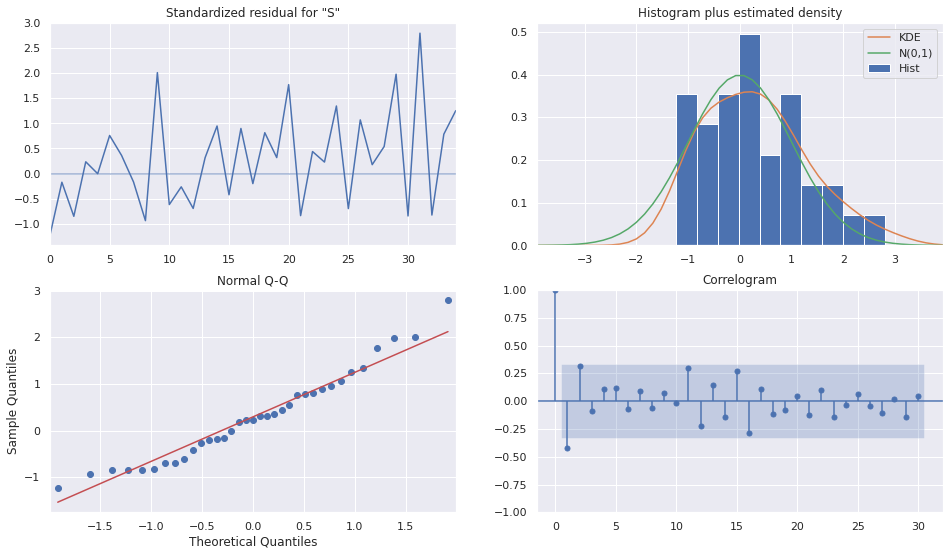

In [ ]:
# instanciando o modelo 1
ARIMA_1 = report_ARIMA(series['Sales'], 0,1,1)

**ARIMA model 2**

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -225.589
Date:                Mon, 28 Feb 2022   AIC                            457.179
Time:                        23:17:22   BIC                            461.929
Sample:                             0   HQIC                           458.837
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        313.3672     38.210      8.201      0.000     238.478     388.257
ma.L1          0.4004      0.162      2.468      0.014       0.082       0.718
sigma2      1.615e+04   4441.939      3.636      0.0

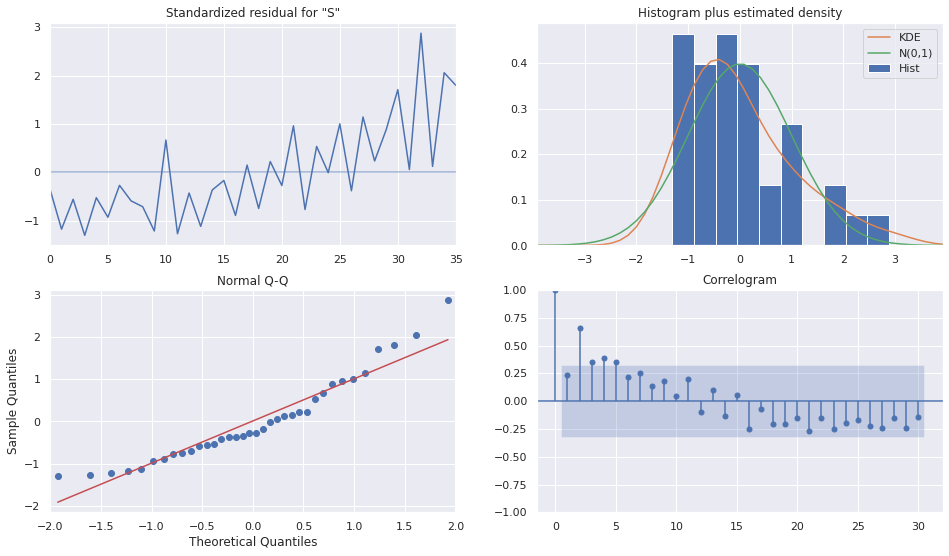

In [ ]:
# instanciando o modelo 2
ARIMA_2 = report_ARIMA(series['Sales'], 0,0,1)

**ARIMA model 3**

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                Mon, 28 Feb 2022   AIC                            406.782
Time:                        23:17:25   BIC                            411.448
Sample:                             0   HQIC                           408.393
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003      0.201     -2.980      0.003      -0.995      -0.205
ma.L1         -0.2756      0.267     -1.033      0.302      -0.799       0.248
sigma2      5382.0426   1386.817      3.881      0.0

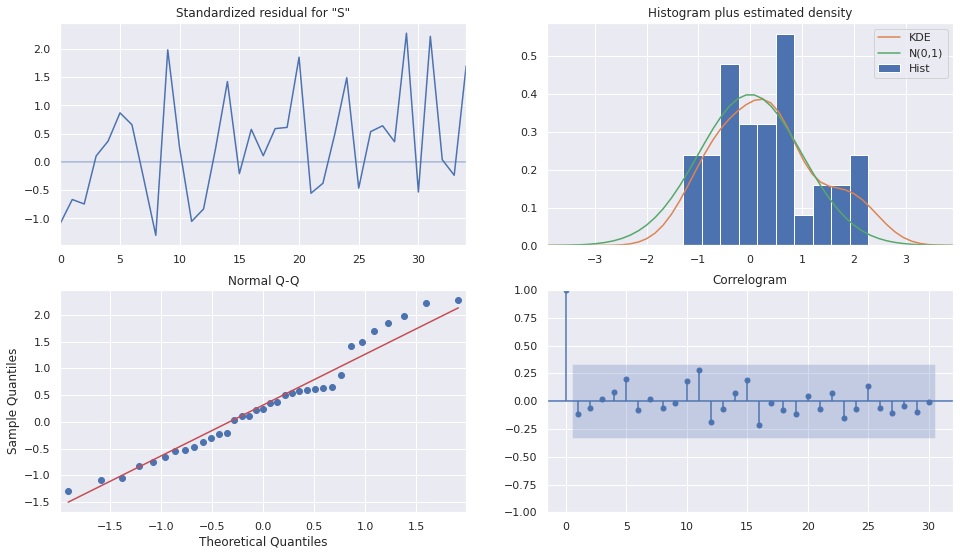

In [ ]:
# instanciando o modelo 3
ARIMA_3 = report_ARIMA(series['Sales'], 1,1,1)

**ARIMA model 4**

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -218.079
Date:                Mon, 28 Feb 2022   AIC                            442.157
Time:                        23:17:34   BIC                            446.908
Sample:                             0   HQIC                           443.815
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.2374     78.267      4.258      0.000     179.838     486.637
ar.L1          0.7509      0.128      5.872      0.000       0.500       1.002
sigma2      1.045e+04   2789.298      3.747      0.0

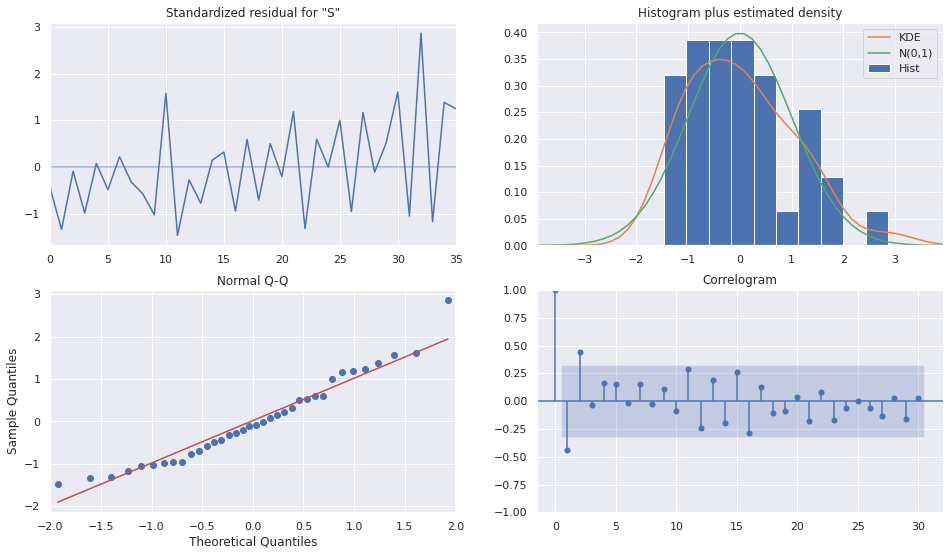

In [ ]:
# instanciando o modelo 4
ARIMA_4 = report_ARIMA(series['Sales'], 1,0,0)

**ARIMA model 5**

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -201.287
Date:                Mon, 28 Feb 2022   AIC                            406.575
Time:                        23:17:39   BIC                            409.686
Sample:                             0   HQIC                           407.649
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7142      0.136     -5.259      0.000      -0.980      -0.448
sigma2      5683.4513   1448.557      3.924      0.000    2844.331    8522.572
Ljung-Box (L1) (Q):                   1.89   Jarque-

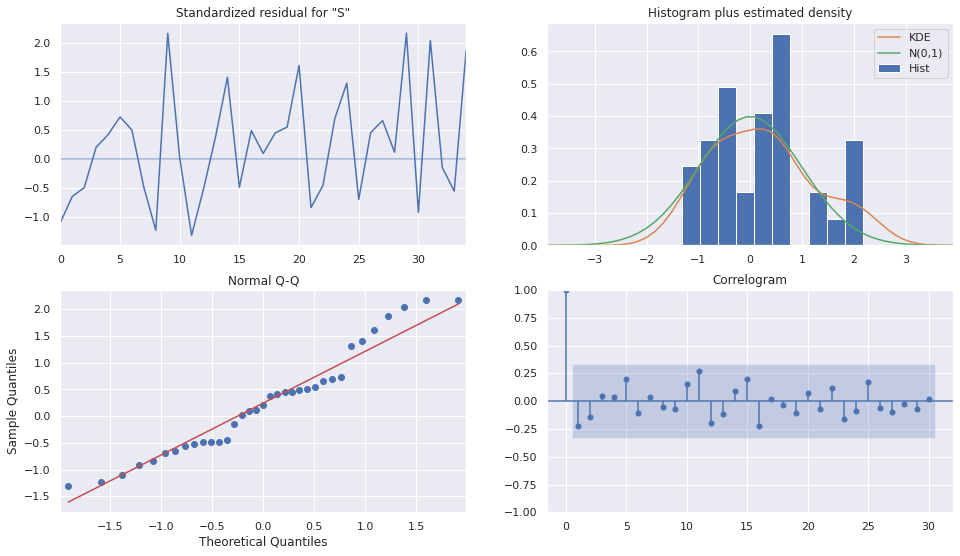

In [ ]:
# instanciando o modelo 5
ARIMA_5 = report_ARIMA(series['Sales'], 1,1,0)

Para otimizar o teste de parâmetros para **p, d e q** para o modelo ARIMA, temos uma função chamada de `auto_arima` da biblioteca **pmdarima** que, praticamente realiza um _tunning_ para encontrar quais os melhores parâmetros.

Link da documentação da biblioteca `PMDARIMA`:
- https://alkaline-ml.com/pmdarima/index.html

Instalando a biblioteca `pmdarima`.

In [ ]:
# !pip install pmdarima  

In [ ]:
# importando a função "auto_arima"
from pmdarima import auto_arima

Link da documentação dos parâmetros:
- https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [ ]:
# utilizando o "auto_arima" para ajudar na buscar dos melhores parâmetros
autoarima_model = auto_arima(series['Sales'], d=1, start_p=1, start_q=1, max_p=6, max_q=6, m=4, 
                             n_fits=15, seasonal=True, D=1, start_P=1, start_Q=1, max_P=1, max_Q=1, 
                             maxiter=150, information_criterion='aic', trace=True, error_action='ignore', 
                             stepwise=False, n_jobs=-1, suppress_warnings=True, random_state=42)


Best model:  ARIMA(1,1,1)(0,1,0)[4]          
Total fit time: 46.737 seconds


> Agora que sabemos os melhores parâmetros, vamos criar um modelo SARIMAX (versão do arima com parâmetros para sazonalidade).

In [ ]:
# importando a função "SARIMAX"
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# utilizando a "SARIMAX" para definir uma função para otimizar o treinamento do modelo 
# com os dados de interesse e retornando o seu resultado
def SARIMAX_model(ts, p, d, q):
    model_fit = SARIMAX(ts, order=[p, d, q], seasonal_order=(0,1,0,4)).fit()
    return model_fit

In [ ]:
# função para otimizar a geração do sumário e plotagem dos gráficos
def report_SARIMAX(series, order_a, order_b, order_c):
    ARIMA_model = SARIMAX_model(series, order_a, order_b, order_c)
    print(ARIMA_model.summary())  # imprimindo o sumário do modelo

    # plotando os gráficos para análise dos resultados do modelo
    fig_model = plt.figure(figsize=(16, 9))
    fig_model = ARIMA_model.plot_diagnostics(fig=fig_model, lags=24)

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                -180.792
Date:                            Mon, 28 Feb 2022   AIC                            367.585
Time:                                    23:19:13   BIC                            371.887
Sample:                                         0   HQIC                           368.987
                                             - 36                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5019      0.229     -2.194      0.028      -0.950      -0.054
ma.L1         -0.7637      0.167   

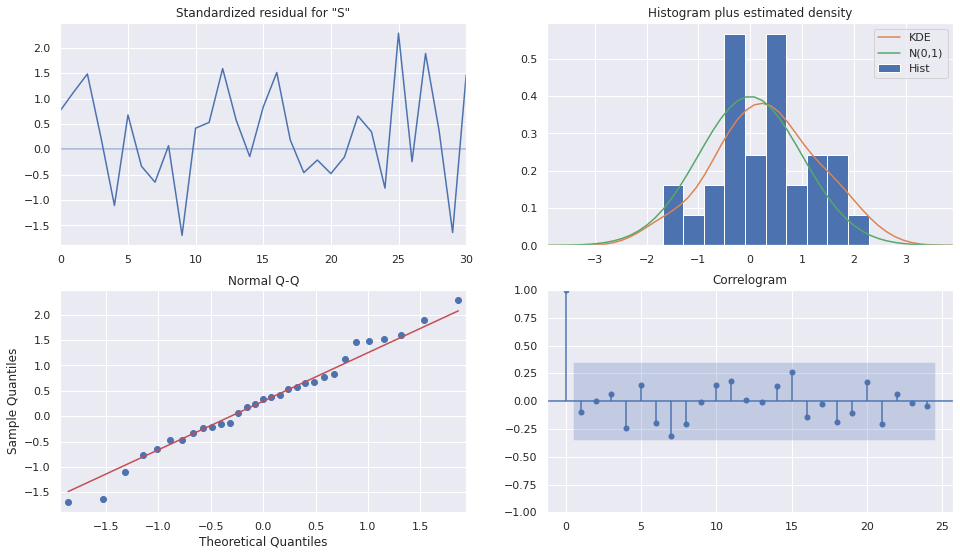

In [ ]:
# instanciando o modelo com os parâmetros ajustados conforme o resultado do "auto_arima"
ARIMA_ajustado = report_SARIMAX(series['Sales'], 1,1,1)

In [ ]:
# setando o índice da série temporal e salvando em uma nova variável "df"
df = series.set_index('Date')

# visualizando as 10 últimas do objeto "df"
df.tail(10)

,Sales
Date,
2003-03-01,315.9
2003-04-01,439.3
2003-05-01,401.3
2003-06-01,437.4
2003-07-01,575.5
2003-08-01,407.6
2003-09-01,682.0
2003-10-01,475.3
2003-11-01,581.3


In [ ]:
# quantidade de observações presentes no objeto
len(df)

36

In [ ]:
# definindo a quantidade de observações que será utilizada para treino do modelo
size = int(len(df) * 0.70)  # 70% para treino e, o restante para teste (30%)
size

25

In [ ]:
# definindo as dados de treino e dados de teste
train_data, test_data = df['Sales'][0: size], df['Sales'][size:]

In [ ]:
# quantidade de observações dos dados de treino e dados de teste
len(train_data), len(test_data)

(25, 11)

In [ ]:
# treinando o modelo com os dados de treino
autoarima_model.fit(train_data)

ARIMA(maxiter=150, order=(1, 1, 1), scoring_args={},
      seasonal_order=(0, 1, 0, 4), suppress_warnings=True,
      with_intercept=False)

In [ ]:
# realizando as previsões com o modelo sobre os dados de teste
future_forecast = autoarima_model.predict(n_periods=len(test_data))
future_forecast

array([473.6486538 , 316.06215662, 393.96741049, 391.34463877,
       525.29821924, 367.71065617, 445.61614065, 442.99331904,
       576.94691031, 419.3593449 , 497.26482988])

In [ ]:
# transformando as previsões em um dataframe
df_forecast = pd.DataFrame(future_forecast, index=test_data.index, columns=['Predicted_sales'])
df_forecast

,Predicted_sales
Date,
2003-02-01,473.648654
2003-03-01,316.062157
2003-04-01,393.967410
2003-05-01,391.344639
2003-06-01,525.298219
2003-07-01,367.710656
2003-08-01,445.616141
2003-09-01,442.993319
2003-10-01,576.946910


In [ ]:
# concatenando os dados de teste com os dados das previsões
df_concat = pd.concat([test_data, df_forecast], axis=1)
df_concat

,Sales,Predicted_sales
Date,,
2003-02-01,440.4,473.648654
2003-03-01,315.9,316.062157
2003-04-01,439.3,393.967410
2003-05-01,401.3,391.344639
2003-06-01,437.4,525.298219
2003-07-01,575.5,367.710656
2003-08-01,407.6,445.616141
2003-09-01,682.0,442.993319
2003-10-01,475.3,576.946910


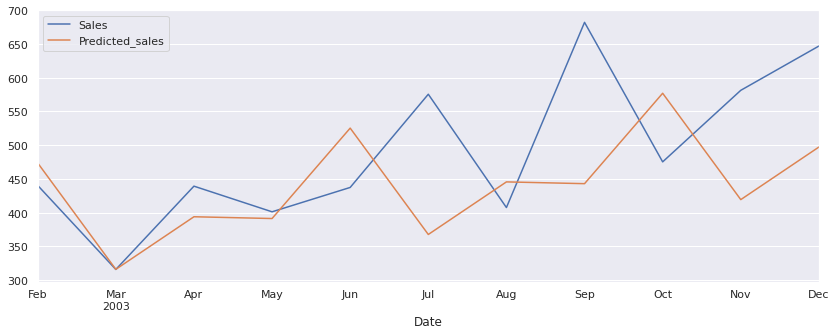

In [ ]:
# visualizando as vendas previstas VS vendas reais
df_concat.plot(figsize=(14,5));

In [ ]:
# instanciando o modelo final com os melhores parâmetros definido no autoarima
model_final = SARIMAX(df, order=(1,1,1), seasonal_order=(0,1,1,4)).fit()

# com o modelo após seu treinamento realizando predições 12 meses passados
preds = model_final.get_prediction(start=-12)
pred_mean = preds.predicted_mean

pred_mean

/home/fgalvao77/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/fgalvao77/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2003-01-01    332.839960
2003-02-01    410.437781
2003-03-01    329.930514
2003-04-01    407.452072
2003-05-01    372.910616
2003-06-01    491.285859
2003-07-01    396.928574
2003-08-01    425.281590
2003-09-01    533.028995
2003-10-01    486.903830
2003-11-01    656.437066
2003-12-01    537.778276
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# instaciando o intervalo de confiança
intervalo_conf = preds.conf_int()

# definindo os intervalos de confiança inferior e superior
limite_inferior = intervalo_conf.iloc[:, 0]
limite_superior = intervalo_conf.iloc[:, 1]

# visualizando o limite inferior e superior
limite_inferior[0], limite_superior[0]

(181.1177114417146, 484.56220817378755)

In [ ]:
# visualizando a média inter-intervalos
pred_mean[0]

332.8399598077511

In [ ]:
# importando biblioteca matemática de alto nível para trabalhar com vetores (arrays)
import numpy as np

In [ ]:
# definindo os índices das datas das predições
datas_preds = np.asarray(pred_mean.index)
datas = np.asarray(df.index)

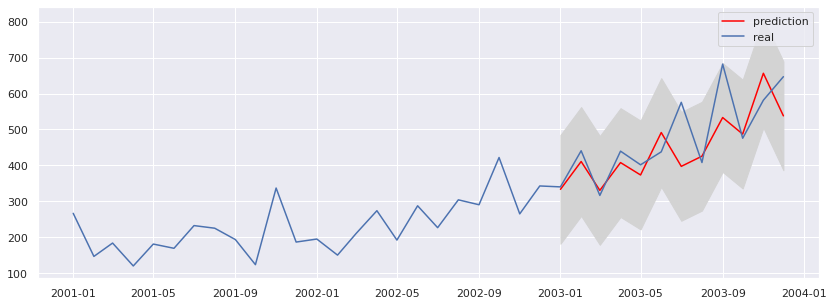

In [ ]:
# plotando o gráfico das predições de 12 meses passados e comparando com as vendas reais
plt.figure(figsize=(14,5))

plt.plot(datas_preds, pred_mean.values, color='red', label='prediction')
plt.fill_between(datas_preds, limite_inferior, limite_superior, color='lightgray')

plt.plot(datas, df.values, label='real')
plt.legend()
plt.show();

In [ ]:
# importando função para cálculo do erro médio quadrático para avaliação do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

# importando função para cálculo da raiz quadrada da biblioteca "math"
from math import sqrt

In [ ]:
# calculando o "MAE" e a raiz de "MSE"
mae_sarima = mean_absolute_error(df[-12:].values, pred_mean.values)
rmse_sarima = sqrt(mean_squared_error(df[-12:].values, pred_mean.values))

# visualizando o resultado
print(
    f'MAE: {round(mae_sarima, 3)}', 
    f'RMSE {round(rmse_sarima, 3)}',
    sep=' | '
)

MAE: 58.839 | RMSE 80.595


In [ ]:
# realizando previsão (forecast) com o modelo para os próximos 12 meses
forecast = model_final.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean

# visualizando os resultados
forecast_mean

2004-01-01    655.480923
2004-02-01    638.164546
2004-03-01    672.910403
2004-04-01    707.051851
2004-05-01    763.505401
2004-06-01    720.645772
2004-07-01    769.020665
2004-08-01    795.890109
2004-09-01    856.223760
2004-10-01    811.293837
2004-11-01    860.773370
2004-12-01    887.053414
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# intervalo de confiança do forecast
intervalo_conf__forecast = forecast.conf_int()

# instanciando os limites inferior e superior
limite_inferior_forecast = intervalo_conf__forecast.iloc[:, 0]
limite_superior_forecast = intervalo_conf__forecast.iloc[:, 1]

# visualizando o limite inferior e superior
limite_inferior_forecast[0], limite_superior_forecast[0]

(503.7810786607927, 807.1807666077477)

In [ ]:
# visualizando a média inter-intervalos do forecast
forecast_mean[0]

655.4809226342702

In [ ]:
# definindo os índices das datas do forecast
datas_forecast = np.asarray(forecast_mean.index)
datas_preds_forecast = np.asarray(pred_mean.index)

datas_ = np.asarray(df.index)

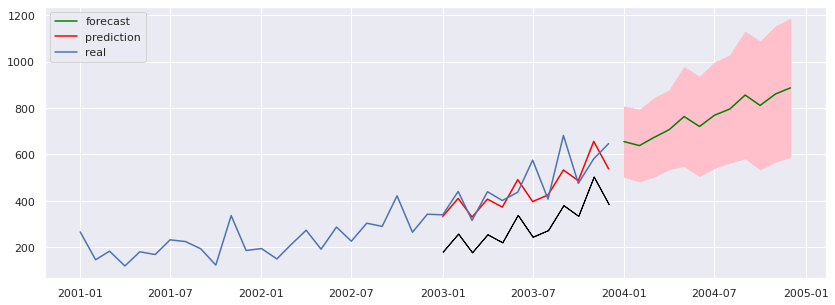

In [ ]:
# plotando gráfico do forecast dos 12 meses
plt.figure(figsize=(14,5))

plt.plot(datas_forecast, forecast_mean.values, color='green', label='forecast')
plt.fill_between(datas_forecast, limite_inferior_forecast, limite_superior_forecast, color='pink')

plt.plot(datas_preds, pred_mean.values, color='red', label='prediction')
plt.fill_between(datas_preds, limite_inferior, limite_inferior, color='black')

plt.plot(datas_, df.values, label='real')
plt.legend(loc='upper left')
plt.show();

### **PROPHET model**

Link da documentação:
- https://facebook.github.io/prophet/

In [ ]:
# criando uma cópia dos conjunto de dados
new_df = df.copy()

# visualizando as 5 primeiras observações
new_df.head()

,Sales
Date,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [ ]:
# resetando o índice
new_df = new_df.reset_index('Date')

# visualizando o nome das colunas
new_df.columns

Index(['Date', 'Sales'], dtype='object')

In [ ]:
# renomeando o nome das colunas
new_df.columns = ['ds', 'y']

> Essa atividade de renomear as colunas é necessária, já que a própria biblioteca só aceita os atributos com os nomes `ds` e `y`. 

In [ ]:
# visualizando o conjunto de dados
new_df

,ds,y
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3
5,2001-06-01,168.5
6,2001-07-01,231.8
7,2001-08-01,224.5
8,2001-09-01,192.8
9,2001-10-01,122.9


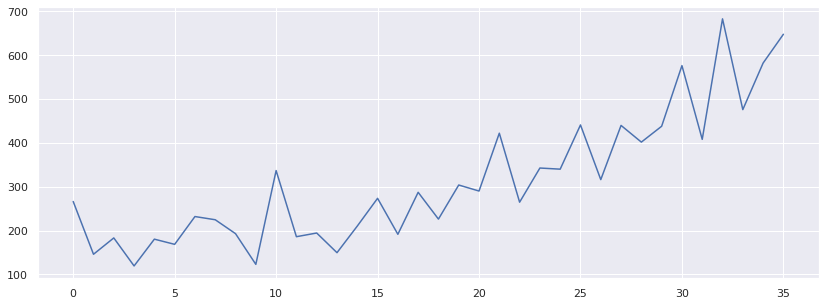

In [ ]:
# plotando gráfico da distribuição dos dados da série temporal
fig, ax = plt.subplots(figsize=(14,5))
new_df['y'].plot(ax=ax);

In [ ]:
# visualizando o tipo de dados dos atributos
new_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

Instalando a biblioteca `prophet`.

In [ ]:
# !pip install pystan==2.19.1.1 prophet

In [ ]:
# importando a função "Prophet" da biblioteca "prophet"
from prophet import Prophet

Irei dividir os dados de _treino_ e _teste_ da mesma forma utilizada na aplicação do **ARIMA**, pra assim termos as mesmas condições com ituito de balizar a avaliação e, para posteriormente analisar qual modelo performou-se melhor.

In [ ]:
# # definindo a quantidade de observações que será utilizada para treino do modelo
# size = int(len(new_df) * 0.70)  # 70% para treino e, o restante para teste (30%)

# # definindo as dados de treino e dados de teste
# train_data, test_data = new_df[0: size], new_df[size:]

# # quantidade de observações - dados de treino e teste
# len(train_data), len(test_data)

In [ ]:
# definindo a quantidade de observações que será utilizada para treino do modelo
size = int(len(new_df) * 0.70)  # 70% para treino e, o restante para teste (30%)
size

25

In [ ]:
# definindo as dados de treino e dados de teste
train_set = new_df.iloc[:size]
test_set = new_df.iloc[size:]

# quantidade de observações - dados de treino e teste
len(train_set), len(test_set)

(25, 11)

**PROPHET model 1**

In [ ]:
# instanciando o modelo 1
model_prophet = Prophet(weekly_seasonality=False, daily_seasonality=False, n_changepoints=10)

In [ ]:
# treinando o modelo 1
model_prophet.fit(train_set)


Initial log joint probability = -72.2804
Iteration  1. Log joint probability =    19.0435. Improved by 91.3239.
Iteration  2. Log joint probability =    25.0109. Improved by 5.96745.
Iteration  3. Log joint probability =    38.4253. Improved by 13.4143.
Iteration  4. Log joint probability =    47.5655. Improved by 9.14024.
Iteration  5. Log joint probability =    58.6262. Improved by 11.0606.
Iteration  6. Log joint probability =    60.7448. Improved by 2.11865.
Iteration  7. Log joint probability =    60.7662. Improved by 0.0214489.
Iteration  8. Log joint probability =    60.7991. Improved by 0.0328068.
Iteration  9. Log joint probability =    60.8606. Improved by 0.0615296.
Iteration 10. Log joint probability =    60.9078. Improved by 0.0472132.
Iteration 11. Log joint probability =    60.9627. Improved by 0.0548907.
Iteration 12. Log joint probability =    61.0173. Improved by 0.0546404.
Iteration 13. Log joint probability =     61.076. Improved by 0.0586709.
Iteration 14. Log joi

In [ ]:
# realizando as predições com o modelo 1
y_pred = model_prophet.predict(test_set)

# visualizando o resultado das predições
y_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-02-01,323.606627,256.393329,282.299896,323.329175,323.869494,-54.070660,-54.070660,-54.070660,-54.070660,-54.070660,-54.070660,0.0,0.0,0.0,269.535967
1,2003-03-01,333.332273,319.007522,344.514630,332.115983,334.509636,-1.889723,-1.889723,-1.889723,-1.889723,-1.889723,-1.889723,0.0,0.0,0.0,331.442550
2,2003-04-01,344.099952,482.580880,509.001142,341.506522,346.432456,151.759207,151.759207,151.759207,151.759207,151.759207,151.759207,0.0,0.0,0.0,495.859159
3,2003-05-01,354.520287,239.839834,266.274677,349.906232,358.270148,-101.878186,-101.878186,-101.878186,-101.878186,-101.878186,-101.878186,0.0,0.0,0.0,252.642101
4,2003-06-01,365.287967,427.524708,457.723806,358.359117,371.000516,77.841499,77.841499,77.841499,77.841499,77.841499,77.841499,0.0,0.0,0.0,443.129466
5,2003-07-01,375.708301,236.554493,268.505436,366.631531,383.430821,-122.940743,-122.940743,-122.940743,-122.940743,-122.940743,-122.940743,0.0,0.0,0.0,252.767559
6,2003-08-01,386.475981,398.234903,433.724737,374.955240,397.084992,29.341620,29.341620,29.341620,29.341620,29.341620,29.341620,0.0,0.0,0.0,415.817600
7,2003-09-01,397.243660,401.343203,440.166523,383.018789,410.876928,23.749058,23.749058,23.749058,23.749058,23.749058,23.749058,0.0,0.0,0.0,420.992719
8,2003-10-01,407.663995,727.055004,770.238740,391.202811,424.097087,341.589181,341.589181,341.589181,341.589181,341.589181,341.589181,0.0,0.0,0.0,749.253176
9,2003-11-01,418.431674,196.914069,243.592364,398.210126,437.347805,-198.473265,-198.473265,-198.473265,-198.473265,-198.473265,-198.473265,0.0,0.0,0.0,219.958410


> Entre todas essas informações presente acima, o que mais interressa pra gente são:<br> -`yhat`: valor previsto;<br> -`yhat_upper`: valor máximo previsto, e<br> -`yhat_lower`: valor mínimo previsto.

In [ ]:
# visualizando as predições de interesse
y_pred[['yhat', 'yhat_upper', 'yhat_lower']]

,yhat,yhat_upper,yhat_lower
0,269.535967,282.299896,256.393329
1,331.442550,344.514630,319.007522
2,495.859159,509.001142,482.580880
3,252.642101,266.274677,239.839834
4,443.129466,457.723806,427.524708
5,252.767559,268.505436,236.554493
6,415.817600,433.724737,398.234903
7,420.992719,440.166523,401.343203
8,749.253176,770.238740,727.055004
9,219.958410,243.592364,196.914069


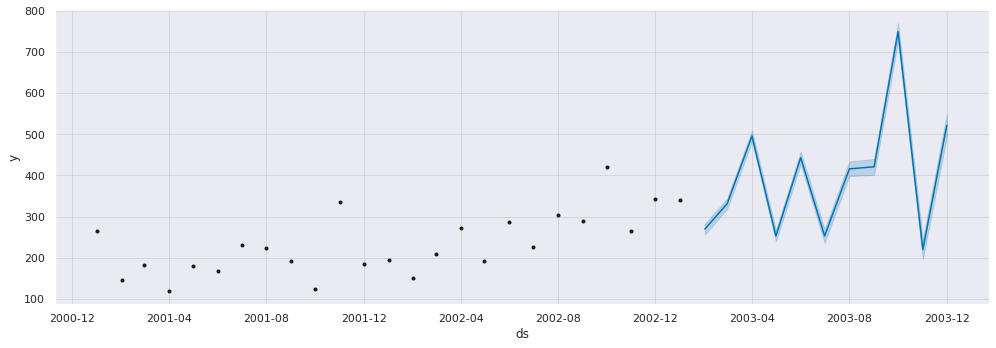

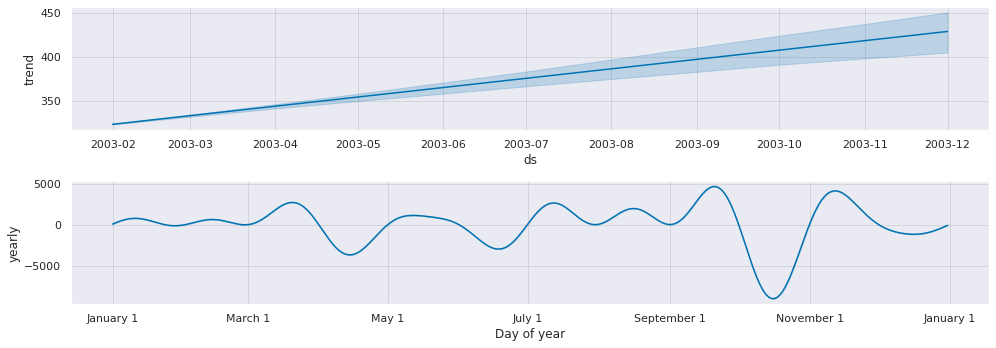

In [ ]:
# plotando o gráfico das predições
figure = (14,5)

fig_1 = model_prophet.plot(y_pred, figsize=figure)
fig_2 = model_prophet.plot_components(y_pred, figsize=figure)

In [ ]:
# importando as funções para avaliação da métrica
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as rmse 

In [ ]:
# visualizando as 5 primeiras observaçoes dos dados de teste
test_set.head()

,ds,y
25,2003-02-01,440.4
26,2003-03-01,315.9
27,2003-04-01,439.3
28,2003-05-01,401.3
29,2003-06-01,437.4


In [ ]:
# visualizando os resutados das métricas
print(
    'MAE: {:.3f}'.format(mae(test_set['y'].values, y_pred['yhat'].values)),
    'RMSE: {:.3f}'.format(rmse(test_set['y'].values, y_pred['yhat'].values, squared=False)),
    sep=' | '
)

MAE: 159.075 | RMSE: 201.903


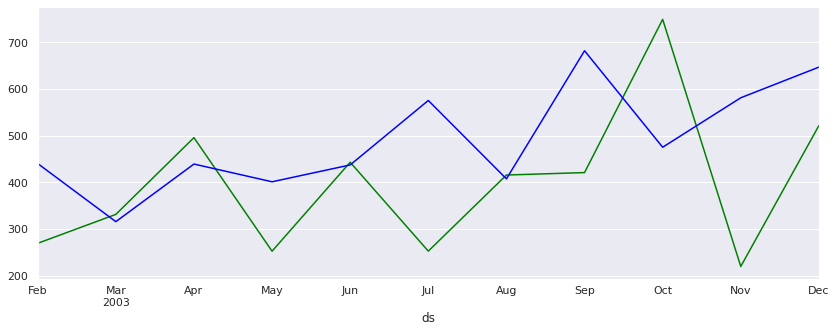

In [ ]:
# plotando o gráfico das predições VS valores reais
y_pred.set_index('ds')['yhat'].plot(color='green', figsize=figure)
test_set.set_index('ds')['y'].plot(color='blue', figsize=figure);

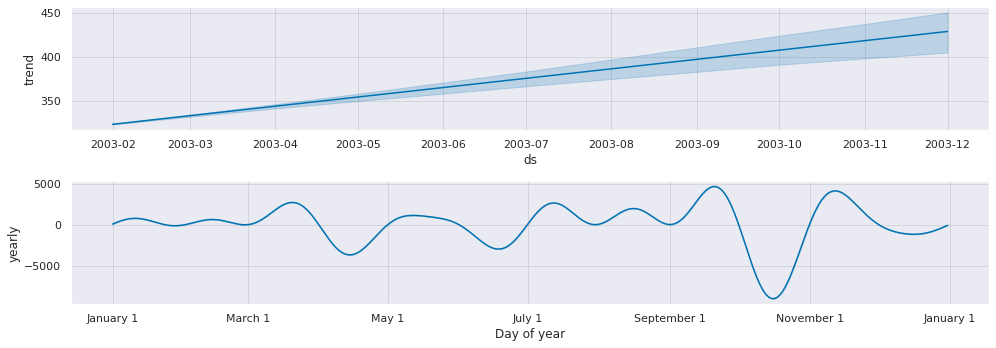

In [ ]:
# plotando os componentes do modelo
components_model_prophet = model_prophet.plot_components(y_pred, figsize=figure);

In [ ]:
# importando funções para realizar a validação cruzada e plotar gráficos com os resultados
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation

In [ ]:
# realizando a validação cruzada e salvando os resultados no objeto "df_cv"
df_cv = cross_validation(model_prophet, initial='365 days', period='90 days', horizon='365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2002-01-01 00:00:00 and 2002-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 9.


In [ ]:
# visualizando os resultados
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-02-01,150.415945,150.414607,150.416803,149.5,2002-01-01
1,2002-03-01,158.968403,158.964055,158.972232,210.1,2002-01-01
2,2002-04-01,274.105404,274.096016,274.114160,273.3,2002-01-01
3,2002-05-01,28.446736,28.431459,28.460040,191.4,2002-01-01
4,2002-06-01,192.125500,192.103900,192.145821,287.0,2002-01-01
5,2002-07-01,75.986270,75.958478,76.012746,226.0,2002-01-01
6,2002-08-01,272.377192,272.342740,272.410657,303.6,2002-01-01
7,2002-09-01,323.237777,323.196387,323.279314,289.9,2002-01-01
8,2002-10-01,144.526909,144.477502,144.576040,421.6,2002-01-01
9,2002-11-01,145.158503,145.100930,145.214441,264.5,2002-01-01


In [ ]:
# realizando avaliação do modelo 
df_report = performance_metrics(df_cv)

# plotando os resultados
df_report

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,31 days,0.838955,0.915945,0.915945,0.006127,0.006127,0.006108,0.0
1,59 days,2614.440200,51.131597,51.131597,0.243368,0.243368,0.277085,0.0
2,90 days,0.648676,0.805404,0.805404,0.002947,0.002947,0.002943,0.0
3,120 days,26553.766326,162.953264,162.953264,0.851375,0.851375,1.482426,0.0
4,151 days,9001.170778,94.874500,94.874500,0.330573,0.330573,0.396032,0.0
5,181 days,22504.119081,150.013730,150.013730,0.663778,0.663778,0.993514,0.0
6,212 days,974.863737,31.222808,31.222808,0.102842,0.102842,0.108417,0.0
7,243 days,1111.407399,33.337777,33.337777,0.114998,0.114998,0.108745,0.0
8,273 days,76769.497961,277.073091,277.073091,0.657194,0.657194,0.978837,0.0
9,304 days,14242.393011,119.341497,119.341497,0.451197,0.451197,0.582639,0.0


In [ ]:
# visualizando as métricas
print(
    f'MAE: {df_report.mae.mean()}',
    f'RMSE: {sqrt(df_report.rmse.mean())}',
    sep=' | '
)

MAE: 101.66228566818415 | RMSE: 10.082771725482242


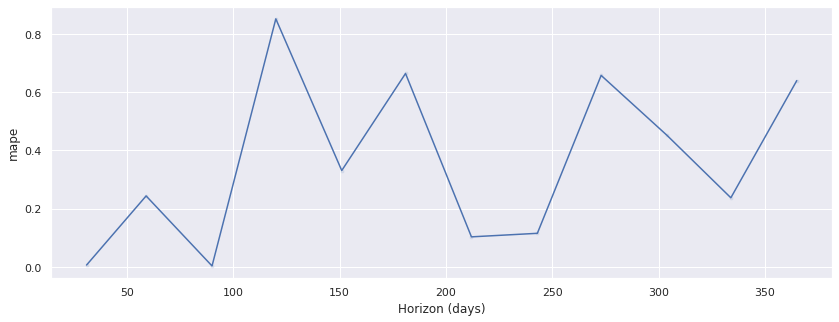

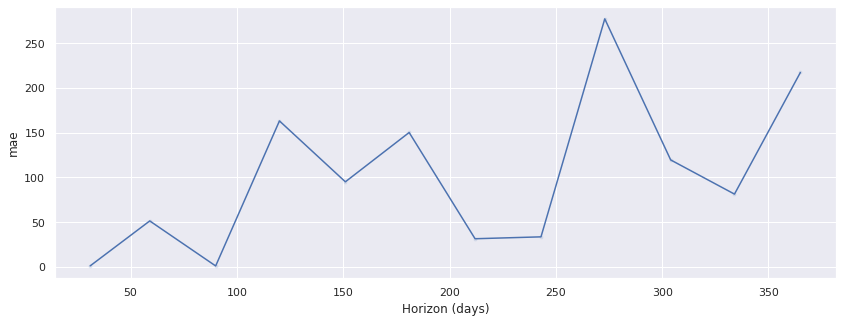

In [ ]:
# plotando o gráfico das métricas de "mape" e "mae"
fig = plot_cross_validation_metric(df_cv, metric='mape', figsize=figure)
fig = plot_cross_validation_metric(df_cv, metric='mae', figsize=figure)

Vamos realizar uma busca dos melhores parâmetros para o modelo.

**PROPHET model 2**

In [ ]:
# visualizando a data inicial e final da série temporal
new_df['ds'].min(), new_df['ds'].max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2003-12-01 00:00:00'))

In [ ]:
# instanciando um intervalo dos dados históricos
cutoffs = pd.to_datetime(['2001-02-01', '2001-08-01', '2002-01-01'])

# realizando uma nova validação cruzada com o dados do intervalo definido
df_cv2 = cross_validation(model_prophet, cutoffs=cutoffs, horizon='90 days')

  0%|          | 0/3 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


In [ ]:
# visualizando o resultdo da nova validação cruzada
df_cv2

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2001-03-01,1688.591559,1688.591558,1688.591561,183.1,2001-02-01
1,2001-04-01,-2933.153412,-2933.153419,-2933.153406,119.3,2001-02-01
2,2001-05-01,-2485.712392,-2485.712405,-2485.712379,180.3,2001-02-01
3,2001-09-01,6891.497977,6890.232171,6893.771588,192.8,2001-08-01
4,2001-10-01,5025.991605,5020.955973,5033.440981,122.9,2001-08-01
5,2002-02-01,150.415945,150.414776,150.417134,149.5,2002-01-01
6,2002-03-01,158.968403,158.964177,158.972292,210.1,2002-01-01
7,2002-04-01,274.105404,274.096791,274.112800,273.3,2002-01-01


In [ ]:
# realizando avaliação da nova validação cruzada do modelo 
df_report2 = performance_metrics(df_cv2)

# plotando os resultados
df_report2

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,28 days,2.266505e+06,1505.491559,1505.491559,8.222237,8.222237,1.608696,0.0
1,31 days,2.243628e+07,4736.694809,3349.806961,17.375205,17.375205,0.948624,0.0
2,59 days,4.660043e+06,2158.713306,1551.792504,12.914867,12.914867,1.138542,0.0
3,61 days,2.404031e+07,4903.091605,4903.091605,39.894968,39.894968,1.904523,0.0
4,89 days,7.107622e+06,2666.012392,2666.012392,14.786536,14.786536,2.000000,0.0
5,90 days,6.486758e-01,0.805404,0.805404,0.002947,0.002947,0.002943,0.0


In [ ]:
# visualizando as métricas
print(
    f'MAE: {df_report2.mae.mean()}',
    f'RMSE: {sqrt(df_report2.rmse.mean())}',
    sep=' | '
)

MAE: 2329.500070934989 | RMSE: 51.59264979095334


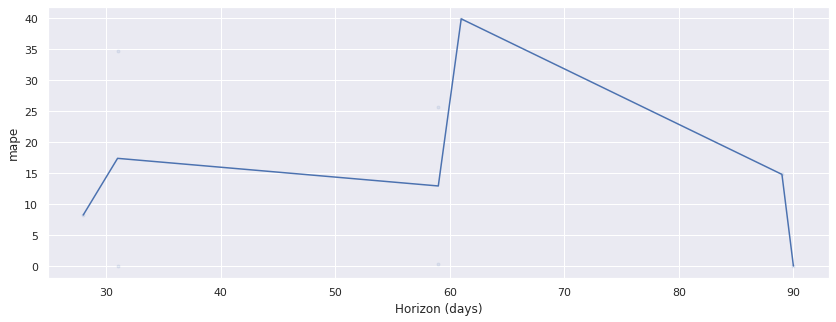

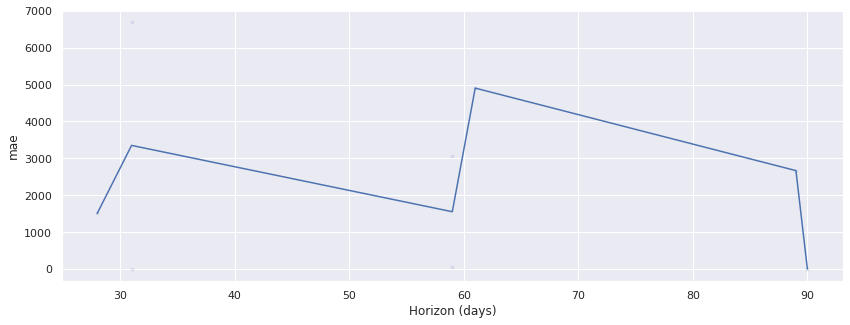

In [ ]:
# plotando o gráfico das métricas de "mape" e "mae"
fig2 = plot_cross_validation_metric(df_cv2, metric='mape', figsize=figure)
fig2 = plot_cross_validation_metric(df_cv2, metric='mae', figsize=figure)

In [ ]:
# importando as bibliotecas
import itertools
import numpy as np
import pandas as pd

# dicionário com os parâmetros
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# gerando todas as combinações dos parâmetros
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# listas para guardar as métricas
rmses = []       # armazenando na lista os RMSE's 
mapes = []       # armazenando na lista os MAPE's 

# usando o cross validation para avaliar todos os parâmetros
for params in all_params:
    model = Prophet(**params, weekly_seasonality=True, 
                   daily_seasonality=True).fit(new_df)  # treinando o modelo com os parâmetros fornecidos
    
    df_cv = cross_validation(model, cutoffs=cutoffs, horizon='90 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)

    rmses.append(df_p['rmse'].values[0])
    mapes.append(df_p['mape'].values[0])

# encontrando os melhores parâmetros
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['mape'] = mapes

print(tuning_results)

INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f0ed4e69250>
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f0ed4e913a0>
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f0ed528a7c0>
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Usin

    changepoint_prior_scale  seasonality_prior_scale         rmse       mape
0                     0.001                     0.01   167.091523   0.746412
1                     0.001                     0.10   152.546849   0.692349
2                     0.001                     1.00   393.766192   1.793221
3                     0.001                    10.00  3575.903574  17.775042
4                     0.010                     0.01   161.726549   0.724499
5                     0.010                     0.10    77.886246   0.335428
6                     0.010                     1.00   746.627132   3.882302
7                     0.010                    10.00  4443.119368  22.645530
8                     0.100                     0.01   165.104964   0.737929
9                     0.100                     0.10   161.524688   0.759443
10                    0.100                     1.00   704.021473   3.564820
11                    0.100                    10.00  4697.409268  24.406580

In [ ]:
# visualizando os melhores parâmetros
best_params = all_params[np.argmin(rmses)]
best_params

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1}

In [ ]:
# instanciando o modelo com os melhores parâmetros
model_prophet_2 = Prophet(**best_params)

# treinando o modelo
model_prophet_2.fit(train_set)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.


In [ ]:
# realizando a validação cruzada e salvando os resultados no objeto "df_cv"
df_cv = cross_validation(model_prophet_2, initial='365 days', period='180 days', horizon='365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2002-01-01 00:00:00 and 2002-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 9.


In [ ]:
# instanciando a previsão para os próximos 6 meses (180 dias)
future_2 = model_prophet_2.make_future_dataframe(periods=180)

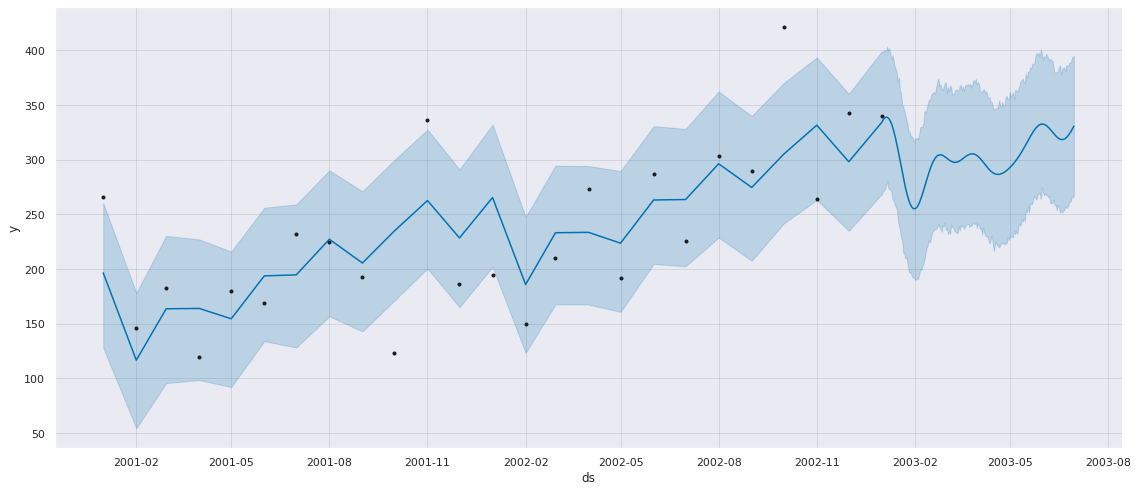

In [ ]:
# realizando as previsões futuras (180 dias)
forecast_2 = model_prophet_2.predict(future_2)

# plotando o gráfico das previsões
fig1 = model_prophet_2.plot(forecast_2, figsize=(16,7))

In [ ]:
# realizando as predições com os dados de teste
y_pred_2 = model_prophet_2.predict(test_set)

# visualizando o resultado das predições
y_pred_2[['yhat', 'yhat_upper', 'yhat_lower']]

,yhat,yhat_upper,yhat_lower
0,255.153493,321.083078,190.913167
1,302.762270,366.494611,236.427326
2,303.159361,368.726642,242.591893
3,292.791131,357.696120,224.525194
4,332.584970,398.885962,264.849664
5,332.509876,397.500728,271.772591
6,365.301767,427.694550,302.747522
7,343.817220,406.730492,281.505628
8,375.256465,441.065812,311.289676
9,400.587508,461.853944,333.015229


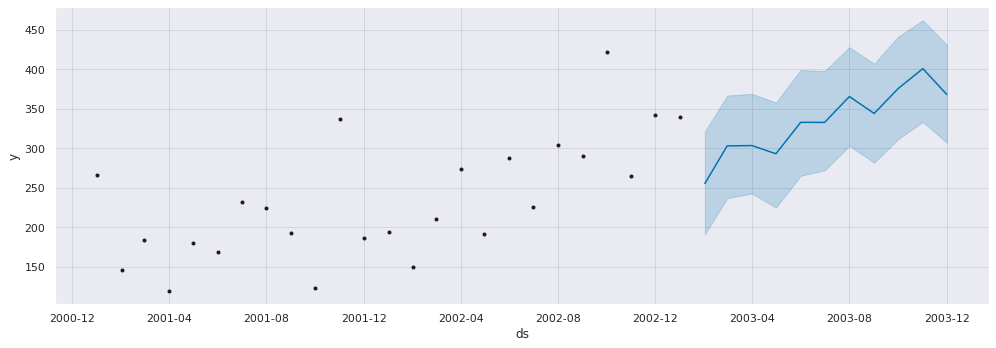

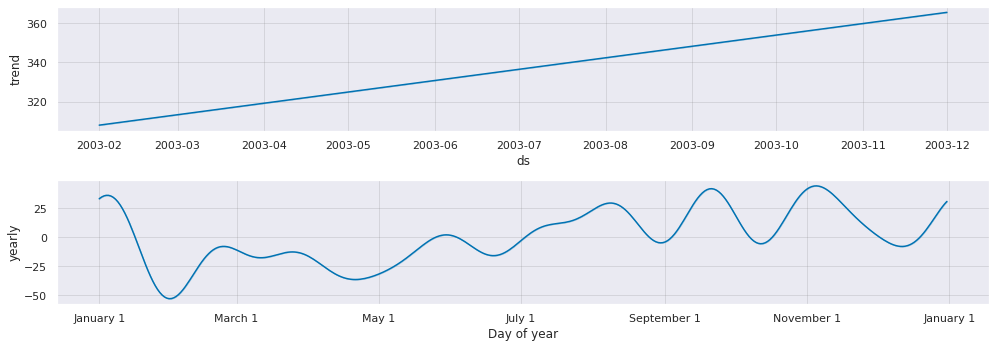

In [ ]:
# plotando o gráfico das predições
figure = (14,5)

fig_1 = model_prophet_2.plot(y_pred_2, figsize=figure)
fig_2 = model_prophet_2.plot_components(y_pred_2, figsize=figure)

In [ ]:
# visualizando os resutados das métricas
print(
    'MAE: {:.3f}'.format(mae(test_set['y'].values, y_pred_2['yhat'].values)),
    'RMSE: {:.3f}'.format(rmse(test_set['y'].values, y_pred_2['yhat'].values, squared=False)),
    sep=' | '
)

MAE: 157.376 | RMSE: 183.779


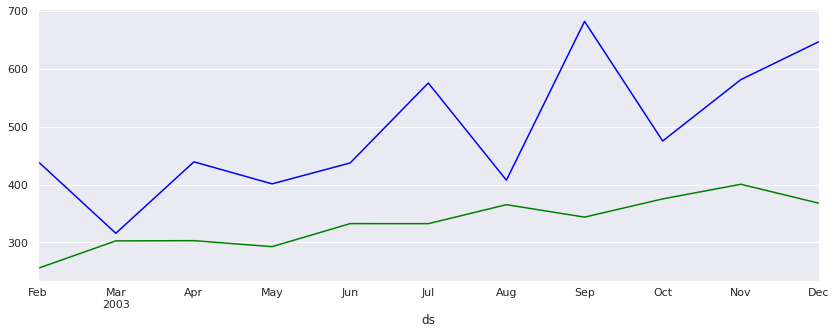

In [ ]:
# plotando o gráfico das predições VS valores reais
y_pred_2.set_index('ds')['yhat'].plot(color='green', figsize=figure)
test_set.set_index('ds')['y'].plot(color='blue', figsize=figure);

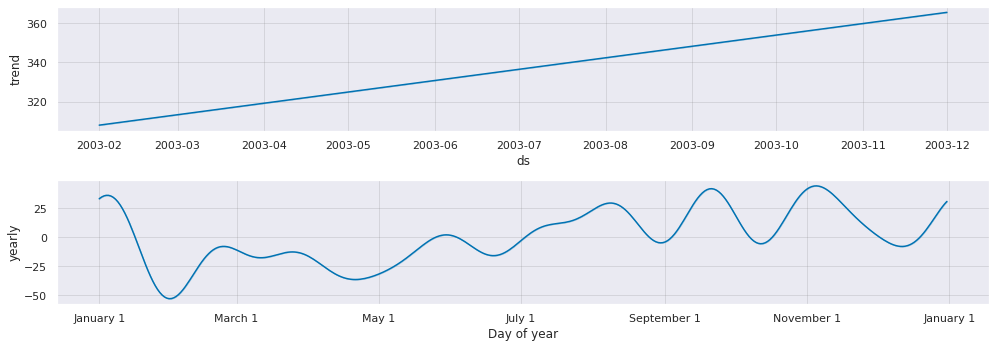

In [ ]:
# plotando os componentes do modelo
components_model_prophet_2 = model_prophet_2.plot_components(y_pred_2, figsize=figure);

**PROPHET model 3**

In [ ]:
# instanciando um novo modelo, alterando as configurações
model_prophet_3 = Prophet(weekly_seasonality=True, daily_seasonality=True, n_changepoints=10)

In [ ]:
# treinando o modelo 3
model_prophet_3.fit(train_set)

In [ ]:
# realizando as predições com o novo modelo
y_pred_3 = model_prophet_3.predict(test_set)

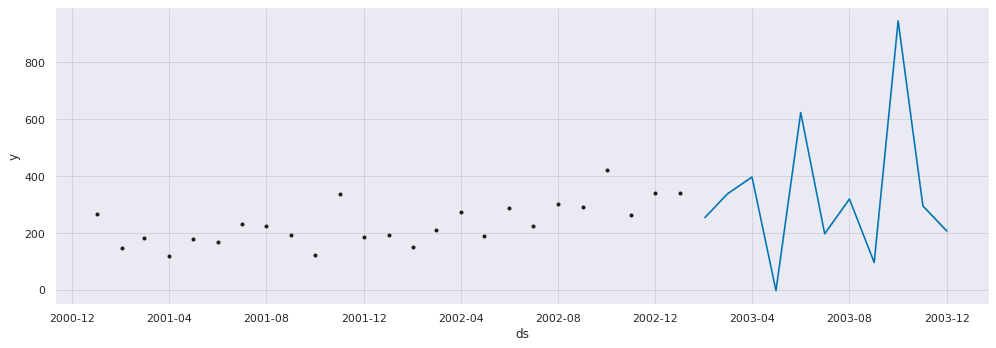

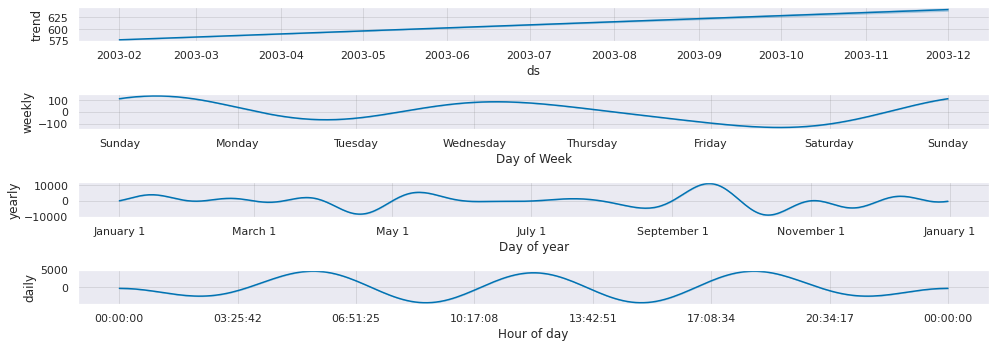

In [ ]:
# plotando o gráfico das predições com o novo modelo
figure = (14,5)

fig_1 = model_prophet_3.plot(y_pred_3, figsize=figure)
fig_2 = model_prophet_3.plot_components(y_pred_3, figsize=figure)

In [ ]:
# visualizando os resutados das métricas do novo modelo
print(
    'MAE: {:.2f}'.format(mae(test_set['y'].values, y_pred_3['yhat'].values)),
    'RMSE: {:.2f}'.format(rmse(test_set['y'].values, y_pred_3['yhat'].values, squared=False)),
    sep=' | '
)

MAE: 280.50 | RMSE: 333.45


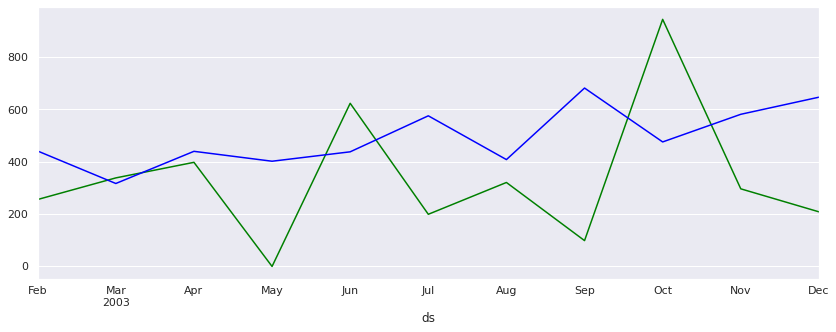

In [ ]:
# plotando o gráfico das predições do novo modelo VS valores reais
y_pred_3.set_index('ds')['yhat'].plot(color='green', figsize=figure)
test_set.set_index('ds')['y'].plot(color='blue', figsize=figure);

Diante dos resultados das métricas e da prṕria visualização gráfica, o segundo modelo (`model_prophet_2`) apresentou melhores resultados.

Portanto utilizaremos este modelo para realizar as previsões (forecast) para os próximos de 12 meses.

In [ ]:
# instanciando as previsões para os próximos 12 meses (365 dias)
future_final = model_prophet_2.make_future_dataframe(periods=365)

# visualizando as 5 primeiras e as 5 últimas datas
display(
    future_final.head(),
    future_final.tail()
)

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01


,ds
385,2003-12-28
386,2003-12-29
387,2003-12-30
388,2003-12-31
389,2004-01-01


In [ ]:
# realizando as predições para os próximos 12 meses
forecast_final = model_prophet_2.predict(future_final)

# visualizando o resultado
forecast_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2001-01-01,196.481897,131.740278,256.512445
1,2001-02-01,116.601401,56.656136,180.638834
2,2001-03-01,163.644515,100.736308,222.296149
3,2001-04-01,163.969000,99.239730,228.790842
4,2001-05-01,154.525524,92.027449,217.392682
...,...,...,...,...
385,2003-12-28,392.572496,327.452753,461.174861
386,2003-12-29,395.541640,331.573355,460.990993
387,2003-12-30,398.335416,337.534140,461.928588
388,2003-12-31,400.892989,339.179834,468.207755


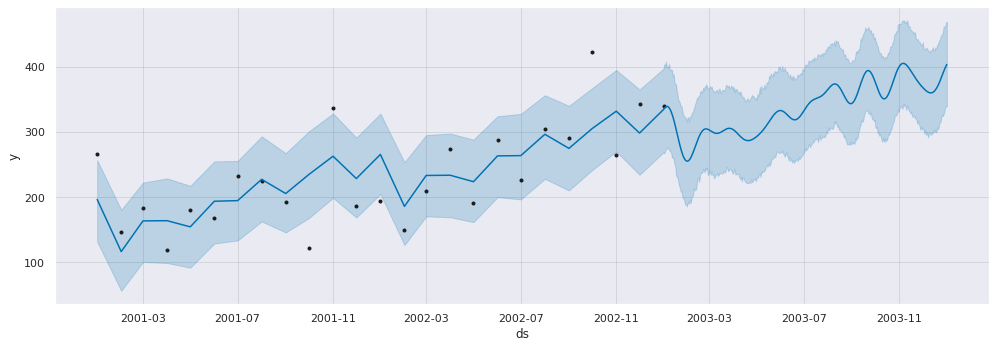

In [ ]:
# plotando gráfico das previsões
fig1 = model_prophet_2.plot(forecast_final, figsize=figure)

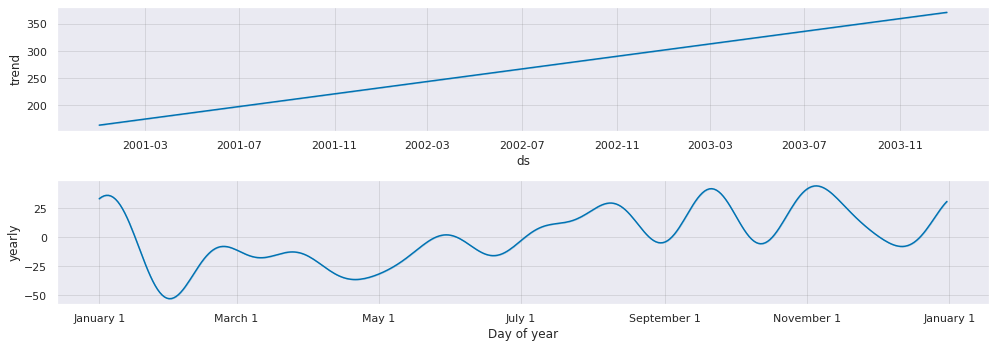

In [ ]:
# plotando os componentes do modelo final
fig2 = model_prophet_2.plot_components(forecast_final, figsize=figure)

Agora irei explorar a utilização de outros métodos para _série temporal_, nessa caso, duas técnicas de _Machine Learning_, uma técnica mais complexa e outra mais simples. São eles:
- `XGBRegressor` e,
- `LinearRegression`.

### **XG BOOST model**

In [ ]:
# visualizando a dimensão do conjunto de dados
df.shape  # linhas e colunas

(36, 1)

In [ ]:
# visualizando os índices do conjunto de dados
df.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01', '2001-11-01', '2001-12-01',
               '2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01', '2002-11-01', '2002-12-01',
               '2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
# instanciando os dados de treino e teste
train_set = df.loc[df.index <= '2003-01-01']
test_set = df.loc[df.index > '2003-01-01']

In [ ]:
# quantidade de observações nos dados de treino e teste
len(train_set), len(test_set)

(25, 11)

In [ ]:
# visualizando a data inicial e final dos dados de treino
train_set.index.min(), train_set.index.max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2003-01-01 00:00:00'))

In [ ]:
# visualizando a data inicial e final dos dados de teste
test_set.index.min(), test_set.index.max()

(Timestamp('2003-02-01 00:00:00'), Timestamp('2003-12-01 00:00:00'))

In [ ]:
# visualizando as observações do atributo "Sales" no conjunto de treino
train_set['Sales']

Date
2001-01-01    266.0
2001-02-01    145.9
2001-03-01    183.1
2001-04-01    119.3
2001-05-01    180.3
2001-06-01    168.5
2001-07-01    231.8
2001-08-01    224.5
2001-09-01    192.8
2001-10-01    122.9
2001-11-01    336.5
2001-12-01    185.9
2002-01-01    194.3
2002-02-01    149.5
2002-03-01    210.1
2002-04-01    273.3
2002-05-01    191.4
2002-06-01    287.0
2002-07-01    226.0
2002-08-01    303.6
2002-09-01    289.9
2002-10-01    421.6
2002-11-01    264.5
2002-12-01    342.3
2003-01-01    339.7
Name: Sales, dtype: float64

In [ ]:
# realizando um "passo atrás" nos dados de treino do atributo "Sales"
train_set['Sales'].shift(-1)

Date
2001-01-01    145.9
2001-02-01    183.1
2001-03-01    119.3
2001-04-01    180.3
2001-05-01    168.5
2001-06-01    231.8
2001-07-01    224.5
2001-08-01    192.8
2001-09-01    122.9
2001-10-01    336.5
2001-11-01    185.9
2001-12-01    194.3
2002-01-01    149.5
2002-02-01    210.1
2002-03-01    273.3
2002-04-01    191.4
2002-05-01    287.0
2002-06-01    226.0
2002-07-01    303.6
2002-08-01    289.9
2002-09-01    421.6
2002-10-01    264.5
2002-11-01    342.3
2002-12-01    339.7
2003-01-01      NaN
Name: Sales, dtype: float64

In [ ]:
# realizando um "passo atrás" nos dados de treino do atributo "Sales"
# e salvando o resultado em um novo atributo chamado "Target"
train_set['Target'] = train_set['Sales'].shift(-1)
train_set.head()

,Sales,Target
Date,,
2001-01-01,266.0,145.9
2001-02-01,145.9,183.1
2001-03-01,183.1,119.3
2001-04-01,119.3,180.3
2001-05-01,180.3,168.5


In [ ]:
# visualizando as 5 últimas linhas
train_set.tail()

,Sales,Target
Date,,
2002-09-01,289.9,421.6
2002-10-01,421.6,264.5
2002-11-01,264.5,342.3
2002-12-01,342.3,339.7
2003-01-01,339.7,NaN


In [ ]:
# removendo o valor "NaN" do conjunto de dados de treino
train_set =  train_set.dropna()
train_set.tail()  # visualizando as 5 últimas linhas

,Sales,Target
Date,,
2002-08-01,303.6,289.9
2002-09-01,289.9,421.6
2002-10-01,421.6,264.5
2002-11-01,264.5,342.3
2002-12-01,342.3,339.7


Vamos realizar o mesmo processo de um `"passo atrás"` e remoção do valor `"NaN"` nos dados de teste (_test_set_).

In [ ]:
# realizando um "passo atrás" nos dados de teste do atributo "Sales"
# e salvando o resultado em um novo atributo chamado "Target"
test_set['Target'] = test_set['Sales'].shift(-1)
test_set.head()

,Sales,Target
Date,,
2003-02-01,440.4,315.9
2003-03-01,315.9,439.3
2003-04-01,439.3,401.3
2003-05-01,401.3,437.4
2003-06-01,437.4,575.5


In [ ]:
# visualizando as 5 últimas linhas
test_set.tail()

,Sales,Target
Date,,
2003-08-01,407.6,682.0
2003-09-01,682.0,475.3
2003-10-01,475.3,581.3
2003-11-01,581.3,646.9
2003-12-01,646.9,NaN


In [ ]:
# removendo o valor "NaN" do conjunto de dados de teste
test_set = test_set.dropna()
test_set.tail()  # visualizando as 5 últimas linhas

,Sales,Target
Date,,
2003-07-01,575.5,407.6
2003-08-01,407.6,682.0
2003-09-01,682.0,475.3
2003-10-01,475.3,581.3
2003-11-01,581.3,646.9


In [ ]:
# instanciando os dados de treino
Xtrain = train_set.loc[:, ['Sales']].values
ytrain = train_set.loc[:, ['Target']].values

# instanciando os dados de teste
Xtest = test_set.loc[:, ['Sales']].values
ytest = test_set.loc[:, ['Target']].values

In [ ]:
# visualizando a dimensão dos objetos
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((24, 1), (24, 1), (10, 1), (10, 1))

Instalando a biblioteca.

In [ ]:
# !pip install xgboost --upgrade

In [ ]:
# importando a função
from xgboost import XGBRegressor

In [ ]:
# instanciando o modelo
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=150, n_jobs=-1, random_state=42)

In [ ]:
# treinando o modelo com os dados de treino
xgb_model.fit(Xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# visualizando a primeira observação dos atributos "Sales" e "Target"
test_set.iloc[0]

Sales     440.4
Target    315.9
Name: 2003-02-01 00:00:00, dtype: float64

In [ ]:
# realizando a predição com o modelo da primeira observação
ypred = xgb_model.predict(np.array([Xtest[0]]))
ypred  # visualizando o resultado

array([264.5007], dtype=float32)

In [ ]:
# plotando o valor real da primeira observação
ytest[0]

array([315.9])

In [ ]:
# calculando o RMSE da primeira observação predita
sqrt(mean_squared_error(Xtest[0], ypred))

175.8992980957031

In [ ]:
# realizando as predições com os dados de "Xtest"
ypred = xgb_model.predict(np.array(Xtest[:]))

# visualizando as predições
ypred

array([264.5007, 289.8996, 264.5007, 264.5007, 264.5007, 264.5007,
       264.5007, 264.5007, 264.5007, 264.5007], dtype=float32)

In [ ]:
# visualizando os resutados das métricas
print(
    'MAE: {:.3f}'.format(mae(Xtest, ypred)),
    'RMSE: {:.3f}'.format(rmse(Xtest, ypred, squared=False)),
    sep=' | '
)

MAE: 208.559 | RMSE: 233.898


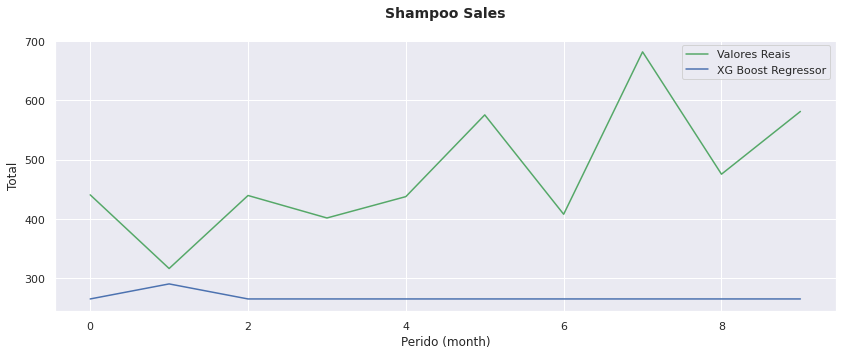

In [ ]:
# criando um gráfico dos valores reais, previsões do XG Boost e do modelo utilizando o último valor
plt.figure(figsize=(14,5))
plt.title('Shampoo Sales\n', 
         {'fontsize': 14,'fontweight': 'bold'})
plt.ylabel('Total')
plt.xlabel(u'Perido (month)')

reg_val, = plt.plot(ypred, color='b', label=u'XG Boost Regressor')
true_val, = plt.plot(Xtest, color='g', label='Valores Reais')

#plt.xlim([0,85])
plt.legend(handles=[true_val, reg_val])
plt.show();

### **Regresão Linear**

In [ ]:
# dimensão do conjunto de dados
df.shape

(36, 1)

In [ ]:
# instanciando duas listas para armazenar os dados da variável explicativa (X) e da variável resposta (y)
X_data, y_data = [], []

# realizando um laço de repetição onde cada linha da matriz X seja composta pelos 6 meses anteriores
for d in range(6, df.shape[0]):

    X = df.iloc[d-6:d].values.ravel()
    y = df.iloc[d].values[0]

    X_data.append(X)
    y_data.append(y)

# visualizando as 5 primeiras observações de cada objeto
print(
    X_data[:5],
    y_data[:5],
    sep='\n\n'
)

[array([266. , 145.9, 183.1, 119.3, 180.3, 168.5]), array([145.9, 183.1, 119.3, 180.3, 168.5, 231.8]), array([183.1, 119.3, 180.3, 168.5, 231.8, 224.5]), array([119.3, 180.3, 168.5, 231.8, 224.5, 192.8]), array([180.3, 168.5, 231.8, 224.5, 192.8, 122.9])]

[231.8, 224.5, 192.8, 122.9, 336.5]


In [ ]:
# transformando o tipo dos objetos de "list" para "numpy.array"
X_data = np.array(X_data)
y_data = np.array(y_data)

# visualizando o tipo de objeto depois da transformação
print(type(X_data))
print(type(y_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# visualizando os dados
X_data, y_data

(array([[266. , 145.9, 183.1, 119.3, 180.3, 168.5],
        [145.9, 183.1, 119.3, 180.3, 168.5, 231.8],
        [183.1, 119.3, 180.3, 168.5, 231.8, 224.5],
        [119.3, 180.3, 168.5, 231.8, 224.5, 192.8],
        [180.3, 168.5, 231.8, 224.5, 192.8, 122.9],
        [168.5, 231.8, 224.5, 192.8, 122.9, 336.5],
        [231.8, 224.5, 192.8, 122.9, 336.5, 185.9],
        [224.5, 192.8, 122.9, 336.5, 185.9, 194.3],
        [192.8, 122.9, 336.5, 185.9, 194.3, 149.5],
        [122.9, 336.5, 185.9, 194.3, 149.5, 210.1],
        [336.5, 185.9, 194.3, 149.5, 210.1, 273.3],
        [185.9, 194.3, 149.5, 210.1, 273.3, 191.4],
        [194.3, 149.5, 210.1, 273.3, 191.4, 287. ],
        [149.5, 210.1, 273.3, 191.4, 287. , 226. ],
        [210.1, 273.3, 191.4, 287. , 226. , 303.6],
        [273.3, 191.4, 287. , 226. , 303.6, 289.9],
        [191.4, 287. , 226. , 303.6, 289.9, 421.6],
        [287. , 226. , 303.6, 289.9, 421.6, 264.5],
        [226. , 303.6, 289.9, 421.6, 264.5, 342.3],
        [303

In [ ]:
# importando as funções para construção do modelo
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# listas para armazenar as previsões de cada modelo
y_pred, y_pred_last, y_pred_ma, y_true = [], [], [], []
end = y_data.shape[0]

# realizando um laço de repetição
for i in range(12, end):

    # dados de treino
    X_train = X_data[:i, :]
    y_train = y_data[:i]

    # dados de teste
    X_test = X_data[i, :]
    y_test = y_data[i]

    # instanciando o modelo
    #model = LinearRegression()
    model = make_pipeline(StandardScaler(with_mean=True),
                          LinearRegression(n_jobs=-1))

    # treinando o modelo
    model.fit(X_train, y_train)

    # realizando as predições com o modelo após seu treinamento e salvando os resultados na lista
    y_pred.append(model.predict([X_test]))
    y_pred_last.append(X_test[-1])
    y_pred_ma.append(X_test.mean())
    y_true.append(y_test)

In [ ]:
# transformando as listas em arrays numpy para facilitar os cálculos
y_pred = np.array(y_pred)
y_pred_last = np.array(y_pred_last)
y_pred_ma = np.array(y_pred_ma)
y_true = np.array(y_true)

In [ ]:
# visualizando as 10 primeiras predições e a classe do objeto
print(
    y_pred[:10],
    type(y_pred),
    sep='\n\n'
)

[[123.83555431]
 [209.31853664]
 [207.76058181]
 [249.60886683]
 [324.35940775]
 [387.57799244]
 [348.40146912]
 [422.52129629]
 [387.21463566]
 [406.60506322]]

<class 'numpy.ndarray'>


In [ ]:
# importando a função para cálculo do erro médio absoluto
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# função para calcular o MAPE
def mape(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# imprimindo os resultados
print('\nMean Absolute Percentage Error - MAPE')
print('Regressão Linear:', round(mape(y_pred, y_true), 3))
print('Último Valor:', round(mape(y_pred_last, y_true), 3))
print('Média Móvel:', round(mape(y_pred_ma, y_true), 3))


print('\nMean Absolute Error - MAE')
print('Regressão Linear:', round(mean_absolute_error(y_pred, y_true), 3))
print('Último Valor:', round(mean_absolute_error(y_pred_last, y_true), 3))
print('Média Móvel:', round(mean_absolute_error(y_pred_ma, y_true), 3))

print('\nMean Squared Error - MSE')
print('Regressão Linear:', round(mean_squared_error(y_pred, y_true, squared=False), 3))
print('Último Valor:', round(mean_squared_error(y_pred_last, y_true, squared=False), 3))
print('Média Móvel:', round(mean_squared_error(y_pred_ma, y_true, squared=False), 3))


Mean Absolute Percentage Error - MAPE
Regressão Linear: 38.865
Último Valor: 25.377
Média Móvel: 16.906

Mean Absolute Error - MAE
Regressão Linear: 67.725
Último Valor: 105.717
Média Móvel: 77.889

Mean Squared Error - MSE
Regressão Linear: 84.557
Último Valor: 125.267
Média Móvel: 100.696


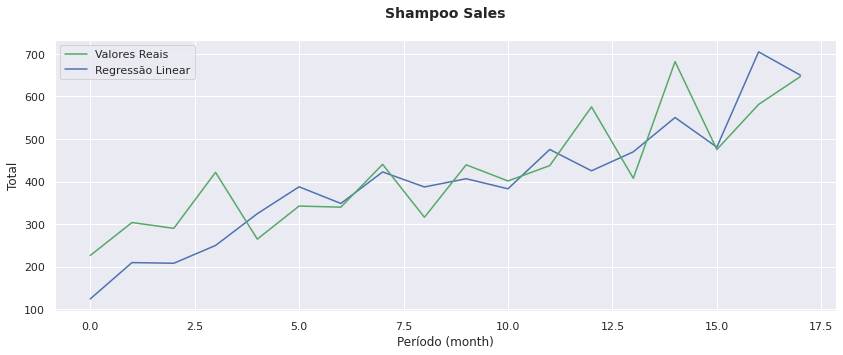

In [ ]:
# criando um gráfico dos valores reais, previsões da regressão linear e do modelo utilizando o último valor
plt.figure(figsize=(14,5))
plt.title('Shampoo Sales\n', 
         {'fontsize': 14,'fontweight': 'bold'})
plt.ylabel('Total')
plt.xlabel(u'Período (month)')

reg_val, = plt.plot(y_pred, color='b', label=u'Regressão Linear')
true_val, = plt.plot(y_true, color='g', label='Valores Reais')

#plt.xlim([0,85])
plt.legend(handles=[true_val, reg_val])
plt.show();

#### **Informações gerais**

Versões das bibliotecas e/ou funções utilizadas nesse notebook.

Instalando a biblioteca `session_info`.

In [ ]:
!pip install session_info

  Using cached session_info-1.0.0.tar.gz (24 kB)
  Using cached stdlib_list-0.8.0-py3-none-any.whl (63 kB)
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8045 sha256=53c2c86e4bcc8a18875c866468357d6d6c9666142f455c1680c234ccf0b67538
  Stored in directory: /home/fgalvao77/.cache/pip/wheels/5c/1b/4d/111d73980c5c6a8e5e5905a19eccc34296cb359cac54c6c5b9
Successfully built session-info


In [ ]:
# importando a biblioteca
import session_info

# visualizando as versões das bibliotecas utilizadas
session_info.show(html=False)

-----
matplotlib          3.4.2
numpy               1.19.5
pandas              1.3.0
pmdarima            1.8.5
prophet             1.0
seaborn             0.11.1
session_info        1.0.0
sklearn             0.23.2
statsmodels         0.13.2
xgboost             1.5.2
-----
IPython             7.25.0
jupyter_client      6.1.12
jupyter_core        4.7.1
notebook            6.4.0
-----
Python 3.8.10 (default, Nov 26 2021, 20:14:08) [GCC 9.3.0]
Linux-5.4.0-100-generic-x86_64-with-glibc2.29
-----
Session information updated at 2022-02-28 23:45


Atividade executada utilizando a _IDE_ do `VS Code` com extensão ao **Jupyter Notebook**.